#Классификация

Загрузка файла, создание датасета.

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('/content/1heart (1).csv', sep=',')

Saving 1heart (1).csv to 1heart (1).csv


Предварительная обработка данных.

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Содержит информацию о сердечных болезнях

1. возраст
2. пол
3. тип боли в груди *(4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])*
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (*норма: нормальная, ST: аномалия ST-T LVN: гипертрофия)*
8. MaxHR: максимальная достигнутая частота сердечных сокращений *[Числовое значение от 60 до 202]*
9. стенокардия, вызванная физической нагрузкой *(да, нет)*
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке *(Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)*
12. HeartDisease: *выходной класс [1: болезнь сердца, 0: нормальный]*

Пример данных:

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,925.000000,923.000000,925.000000,924.000000,925.000000,925.000000
mean,53.451892,132.442037,0.231351,136.979437,0.882162,0.550270
std,9.453069,18.464707,0.421925,25.507091,1.064803,0.497736
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


На основе таблицы данных можно сказать, что средний возраст пациентов - 53 года, немного больше половины имеют заболевание сердца. Также можно выяснить максимальные, средние и минимальные значения для таких показателей, как возраст, артериальное давление в покое, уровень сахара в крови натощак, максимальная достигнутая частота сердечных сокращений, депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя.

In [ ]:
df.shape

(925, 12)

В датасете 925 записей и 12 колонок.

In [ ]:
df.isna().sum() #подсчет количества пропусков

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В датасете в некоторых колонках присутствуют пропуски. Так как все данные, замененные 0 в числовых ячейках повлияют на кластеризацию. Производится удаление всех пустых записей. А затем подсчет количества пропусков для проверки удаления.

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Все пропуски данных были успешно удалены.

In [ ]:
df.duplicated().sum() # подсчет количества дубликатов

3

Так как обнаружены дубликаты, они удаляются и осуществляется проверка удаления.

In [ ]:
df = df.drop_duplicates() # удаление дубликатов
df.duplicated().sum()

0

Все явные дубликаты устранены.

Производится обновление индексации.

In [ ]:
df.reset_index(drop=True, inplace=True) # обновление индексации; аргумент drop, чтобы не создавать столбец index

Для каждого текстового столбца осуществляется поиск уникальных значений и при наличии дубликатов устранение их.

In [ ]:
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F' 'Ma']


Обнаружены дубликаты. Необходимо заменить 'Ma' на 'М'. Также осуществляется проверка.

In [ ]:
df['Sex'].replace('Ma', 'M', inplace=True)
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F']


<ipython-input-13-23355d7716d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'].replace('Ma', 'M', inplace=True)


Успешное устранение.

In [ ]:
print(df['ChestPainType'].unique()) # Поиск уникальных значений в столбце "ChestPainType"

['ATA' 'NAP' 'ASY' 'TA']


Дубликаты не обнаружены.

In [ ]:
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

Так как это числа, данные не нуждаются в вычислении дубликатов. Однако есть числа с буквами, которые стоит заменить. Также сделана проверка для того, чтобы убедиться в корректной замене.

In [ ]:
df['Cholesterol'].replace('a241', '241', inplace=True)
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

<ipython-input-16-a1dfe7792fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].replace('a241', '241', inplace=True)


Неявные дубликаты устранены.

In [ ]:
print(df['RestingECG'].unique()) # Поиск уникальных значений в столбце "RestingECG"

['Normal' 'ST' 'LVH']


Дубликаты не обнаружены.

In [ ]:
print(df['ExerciseAngina'].unique()) # Поиск уникальных значений в столбце "ExerciseAngina"

['N' 'Y']


Дубликаты не обнаружены.

In [ ]:
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down' 'UP']


Обнаружен дубликат. Нужно 'UP' заменит на 'Up'. После замены осуществляется проверка.

In [ ]:
df['ST_Slope'].replace('UP', 'Up', inplace=True)
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down']


<ipython-input-20-1096b159c815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ST_Slope'].replace('UP', 'Up', inplace=True)


Дубликат устранен.

Ранее было замечено несоответствие данных колонки "Cholesterol" типу текстовому. Соответственно требуется изменить его на float. После изменения производится проверка.

In [ ]:
df['Cholesterol'] = df['Cholesterol'].astype(float)
df['Cholesterol'].dtypes

dtype('float64')

Тип успешно изменен.

Целевой переменной данного датафрейма является 'HeartDisease', которая показывает, есть ли у человека сердечное заболевание или нет.

Построена матрица диаграмм рассеяния, где значения целевой переменной выделены разными цветами.

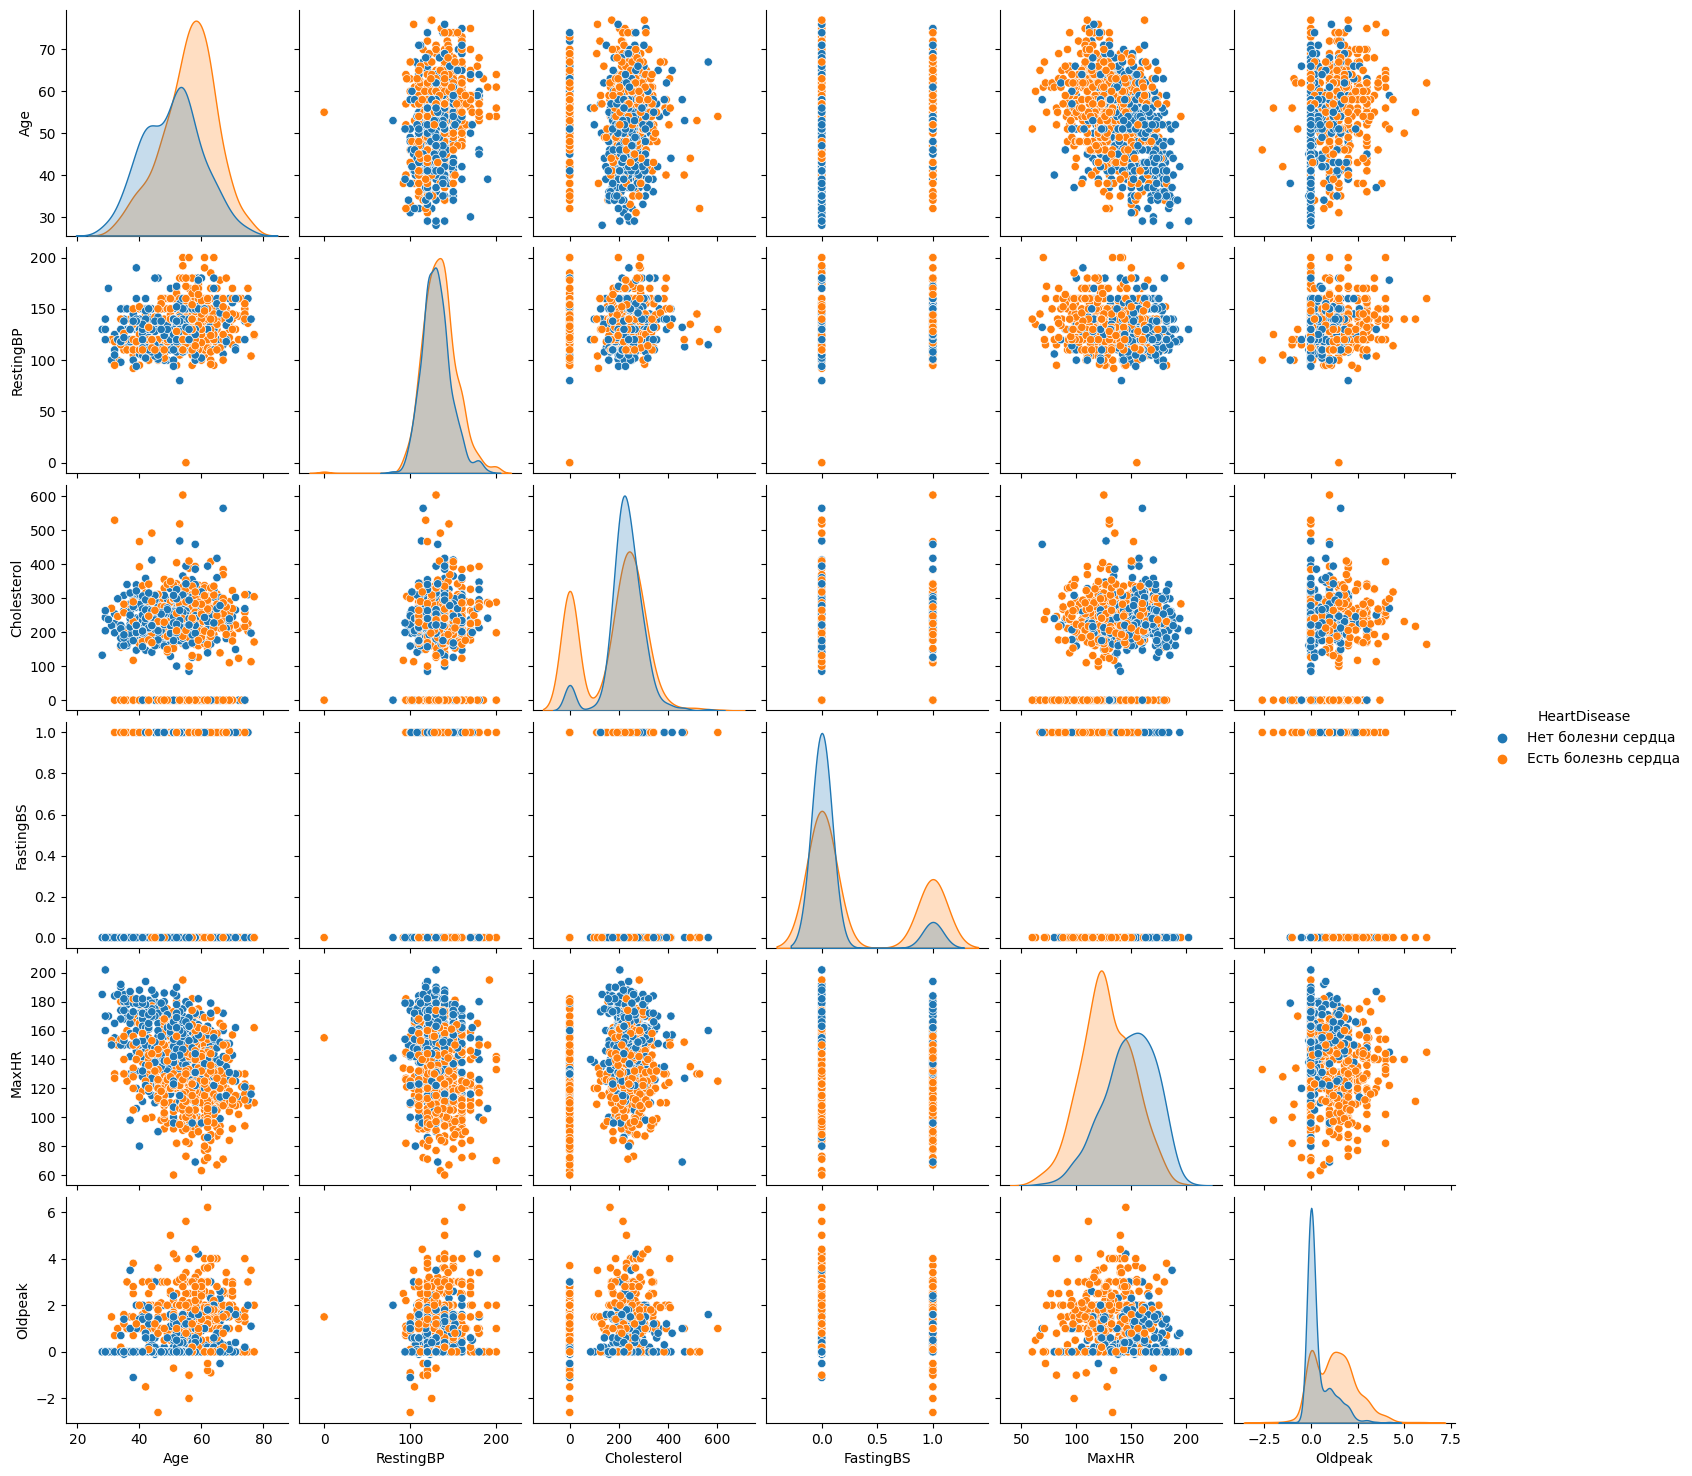

In [ ]:
import seaborn as sns
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

m = df
m['HeartDisease'] = m['HeartDisease'].replace(to_replace=[0, 1], value=['Нет болезни сердца', 'Есть болезнь сердца']) # замена числовых значений на текстовые
sns.pairplot(data=m, hue='HeartDisease')

На диагонали матрицы показаны графики плотности распределения каждой переменной. На недиагональных элементах показаны диаграммы рассеяния между парами переменных. Каждая точка на диаграмме рассеяния имеет цвет в зависимости от значения целевой переменной. Это помогает увидеть, как целевая переменная связана с другими переменными и какие переменные имеют сильную или слабую корреляцию между собой.

Анализ матрицы рассеяния:

У людей без сердечных заболеваний низкий уровень сахара натощак преимущественно в возрасте до 40, после возможны повышенные значения. У тех, у кого есть болезни сердца, чаще всего имеют повышенный уровень сахара, особенно в молодом возрасте до 40 лет этот показатель явно выделяет их на фоне здоровых людей. (FastingBS - Age) Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми в основном в возрасте до 60 лет. Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца всех возрастов. (MaxHR - Age, MaxHR - RestingBP, MaxHR - Cholesterol) Депрессия, вызванная нагрузкой, выше у пациентов с сердечными заболеваниями, большинство значений нижней границы принадлежит здоровым людям. (Oldpeak - Age, Oldpeak - RestingBP) Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми, Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца, причем уровень сахара на это не влияет (имеются значения как высокие, так и низкие, при одинаковом значении частоты сокращений). (MaxHR - FastingBS) Максимальные и минимальные значения депресси, вызванной нагрузкой, принадлежат пациентам с заболеваниями сердца. Максимум доятигается при нормальном уровне сахара, а минимум при повышенном. Значения дипресси близкие к средним и к 0 принадлежат преимущественно здоровым людям. (Oldpeak - FastingBS) Большинство значений ниже среднего макисмальной частоты сердечных сокращений и при этом преимущественно высоких значений депрессии при высоких нагрузках принадлежит людям с сердечными заболеваниями. Большинство значений выше среднего макисмальной частоты сердечных сокращений и при этом преимущественно низких значений депрессии при высоких нагрузках принадлежит здоровым людям. (Oldpeak - MaxHR)

Разбиение набора данных на тренировочный и тестовый датасеты с помощью train_test_split и выполнение стандартизации числовых данных с помощью StandardScaler (20% test, 80% train).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_num = X.select_dtypes(include='number') # выбираются только числовые столбцы

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2)

scaler = StandardScaler() # создание

# преобразование
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Разработка предсказательной модели качественного отклика методом k- ближайших соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# рассчет оптимального количества соседей при помощи кросс-валидации
k_values = list(range(1, 21)) # список возможных значений

accuracy_scores = [] # список хранилище значений средней точности для каждого

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)

  scores = cross_val_score(knn, X_train_scaled, y_train, cv=12, scoring="accuracy") # 12 фолдов(части разделения), метрика точности - accuracy
  mean_score = scores.mean() # среднее значение точности
  accuracy_scores.append(mean_score)

max_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_values[max_index]

knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled) # предсказание качественного отклика

Метод k-ближайших соседей - это метрический алгоритм для автоматической классификации объектов или регрессии. Он основан на идее, что объекты, которые находятся близко друг к другу в пространстве признаков, имеют схожие свойства или принадлежат одному классу. Для того, чтобы классифицировать новый объект, метод находит k ближайших к нему объектов из обучающей выборки, которые уже имеют известные метки классов, и присваивает новому объекту тот класс, который встречается среди соседей чаще всего. Для того, чтобы определить расстояние между объектами, метод использует различные метрики, например, евклидову, манхэттенскую или косинусную.

Разработка предсказательной модели качественного отклика методом дерева решений.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini") # gini для выбора наилучшего варианта разделения

dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

Метод классификации дерева решений - это один из способов машинного обучения с учителем, который использует древовидную структуру для предсказания меток классов объектов на основе их признаков. Дерево решений состоит из узлов, ветвей и листьев. Корневой узел - это начальная точка дерева, в котором задается первый вопрос или условие, относящееся к признакам объектов. Ветви - это ответвления дерева, которые соединяют узлы и листья. Листья - это конечные узлы дерева, в которых присваиваются метки классов объектам. Внутренние узлы - это узлы, которые не являются корневыми или листовыми, и в которых задаются дополнительные вопросы или условия, разделяющие объекты на подгруппы. Процесс построения дерева решений называется индукцией деревьев решений, и он заключается в выборе наилучшего признака для расщепления данных на каждом узле, пока не будет достигнут критерий остановки, например, все объекты в листе имеют одинаковую метку класса или достигнута максимальная глубина дерева. Для выбора наилучшего признака для расщепления используются различные меры, такие как прирост информации, индекс Джини или уменьшение дисперсии. Для классификации нового объекта, необходимо спуститься по дереву от корня до листа, следуя ветвям, которые соответствуют признакам объекта, и выдать метку класса, которая записана в листе.

Разработка предсказательной модели качественного отклика методом логистической регрессии.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

Метод классификации логистической регрессии - это один из статистических методов машинного обучения с учителем, который использует линейную модель для предсказания вероятности принадлежности объекта к одному из двух классов. Этот метод основан на логистической функции, которая преобразует линейную комбинацию признаков объекта в значение от 0 до 1, интерпретируемое как вероятность положительного класса. Для обучения модели используется метод максимального правдоподобия, который подбирает параметры линейной модели так, чтобы максимизировать вероятность наблюдаемых данных. Для классификации нового объекта используется пороговое правило, которое присваивает объекту тот класс, вероятность которого больше заданного порога, например, 0.5.

Разработка предсказательной модели качественного отклика методом случайного леса.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

Метод классификации случайного леса - это один из способов машинного обучения, который использует ансамбль решающих деревьев для предсказания класса объекта. Каждое дерево в ансамбле обучается на случайной подвыборке из исходных данных и использует случайный набор признаков для разбиения узлов. Таким образом, деревья становятся разнообразными и менее склонными к переобучению. Классификация объекта происходит путем голосования деревьев: выбирается тот класс, который получил больше всего голосов от деревьев.

Оценка ошибки классификации для каждого метода. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score

print("МЕТОД К- БЛИЖАЙШИХ СОСЕДЕЙ:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision score: {precision_score(y_test, y_pred_knn)}")
print(f"Recall score: {recall_score(y_test, y_pred_knn)}")
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_pred_knn)}")

print("МЕТОД ДЕРЕВА РЕШЕНИЙ:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision score: {precision_score(y_test, y_pred_dt)}")
print(f"Recall score: {recall_score(y_test, y_pred_dt)}")
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_pred_dt)}")

print("МЕТОД ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision score: {precision_score(y_test, y_pred_lr)}")
print(f"Recall score: {recall_score(y_test, y_pred_lr)}")
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_pred_lr)}")

print("МЕТОД СЛУЧАЙНОГО ЛЕСА:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision score: {precision_score(y_test, y_pred_rf)}")
print(f"Recall score: {recall_score(y_test, y_pred_rf)}")
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_pred_rf)}")

МЕТОД К- БЛИЖАЙШИХ СОСЕДЕЙ:
Accuracy score: 0.717391304347826
Precision score: 0.7340425531914894
Recall score: 0.71875
Balanced accuracy score: 0.7173295454545454
МЕТОД ДЕРЕВА РЕШЕНИЙ:
Accuracy score: 0.6358695652173914
Precision score: 0.6666666666666666
Recall score: 0.6041666666666666
Balanced accuracy score: 0.637310606060606
МЕТОД ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:
Accuracy score: 0.6902173913043478
Precision score: 0.7096774193548387
Recall score: 0.6875
Balanced accuracy score: 0.6903409090909092
МЕТОД СЛУЧАЙНОГО ЛЕСА:
Accuracy score: 0.7282608695652174
Precision score: 0.7395833333333334
Recall score: 0.7395833333333334
Balanced accuracy score: 0.7277462121212122


Метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score' - это способы измерить качество модели классификации, то есть способности модели правильно определить, к какому классу принадлежит объект.

- Accuracy - это доля правильно классифицированных объектов от общего числа объектов. Чем выше accuracy, тем лучше модель. Например, если модель правильно классифицирует 90 из 100 объектов, то ее accuracy равна 0.9 или 90%.
- Precision - это доля объектов положительного класса среди тех, которые были классифицированы как положительные. Чем выше precision, тем меньше ложноположительных ошибок, то есть случаев, когда модель относит объект отрицательного класса к положительному. Например, если модель классифицирует 30 объектов как положительные, из которых 25 действительно положительные, то ее precision равна 0.83 или 83%.
- Recall - это доля объектов положительного класса, которые были правильно классифицированы. Чем выше recall, тем меньше ложноотрицательных ошибок, то есть случаев, когда модель пропускает объект положительного класса. Например, если в данных есть 40 объектов положительного класса, из которых модель определила 30, то ее recall равен 0.75 или 75%.
- Balanced accuracy - это средняя полнота по всем классам. Она учитывает несбалансированность классов в данных, то есть разное количество объектов в каждом классе. Чем выше balanced accuracy, тем лучше модель учитывает все классы. Например, если в данных есть два класса, положительный и отрицательный, и модель имеет recall 0.8 для положительного класса и 0.6 для отрицательного класса, то ее balanced accuracy равна 0.7 или 70%.
- F1 score - это среднее гармоническое между precision и recall. Она показывает баланс между этими двумя метриками. Чем выше F1 score, тем лучше модель достигает оптимального соотношения между точностью и полнотой. Например, если модель имеет precision 0.8 и recall 0.7, то ее F1 score равна 0.75 или 75%.


Анализ методов классифицирования, основанный на значениях метрик:

- МЕТОД К- БЛИЖАЙШИХ СОСЕДЕЙ: Этот метод показывает самую высокую точность среди всех моделей, равную 0.7174. Он также имеет высокие значения точности, полноты и сбалансированной точности, которые составляют 0.7340, 0.7188 и 0.7173 соответственно. Это означает, что этот метод хорошо справляется с классификацией объектов и минимизирует ошибки как первого, так и второго рода.
- МЕТОД ДЕРЕВА РЕШЕНИЙ: Этот метод показывает самую низкую точность среди всех моделей, равную 0.6359. Он также имеет низкие значения точности, полноты и сбалансированной точности, которые составляют 0.6667, 0.6042 и 0.6373 соответственно. Это означает, что этот метод плохо справляется с классификацией объектов и допускает много ошибок как первого, так и второго рода.
- МЕТОД ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ: Этот метод показывает среднюю точность среди всех моделей, равную 0.6902. Он также имеет средние значения точности, полноты и сбалансированной точности, которые составляют 0.7097, 0.6875 и 0.6903 соответственно. Это означает, что этот метод справляется с классификацией объектов лучше, чем метод дерева решений, но хуже, чем метод к-ближайших соседей.
- МЕТОД СЛУЧАЙНОГО ЛЕСА: Этот метод показывает самые высокие значения точности, полноты и сбалансированной точности среди всех моделей, которые составляют 0.7396, 0.7396 и 0.7277 соответственно. Он также имеет высокую точность, равную 0.7283. Это означает, что этот метод очень хорошо справляется с классификацией объектов и минимизирует ошибки как первого, так и второго рода.

Исходя из этого анализа, можно сделать вывод, что метод случайного леса является лучшим из всех моделей, а метод дерева решений является худшим.

Построение матрицы неточностей с помощью confusion_matrix для каждого метода.

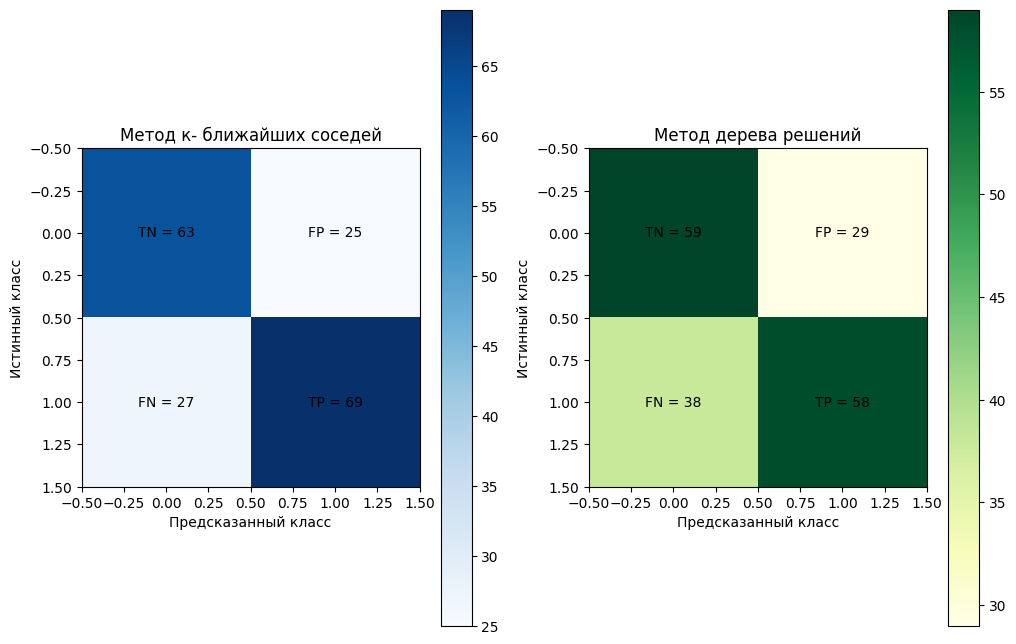

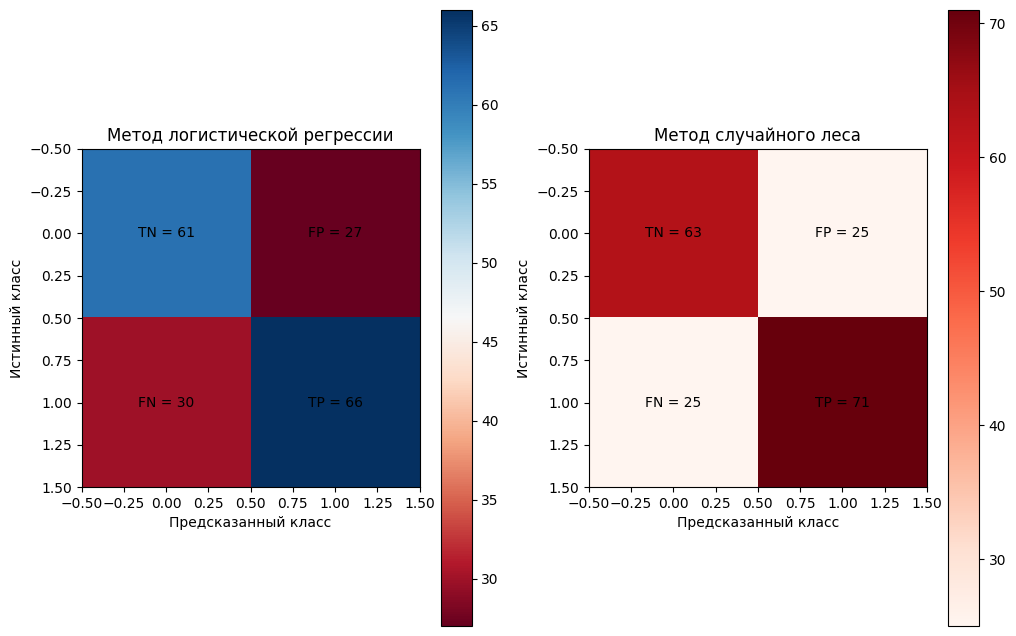

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_rf = confusion_matrix(y_test,y_pred_rf)

t = ["TN", "FP", "FN", "TP"]

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.imshow(cm_knn, cmap="Blues")
plt.title("Метод к- ближайших соседей")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.colorbar()

m=0
for i in range(cm_knn.shape[1]):
  for j in range(cm_knn.shape[1]):
    plt.text(j, i, f"{t[m]} = {cm_knn[i,j]:d}", ha="center", va="center", color="black")
    m+=1

plt.subplot(1, 2, 2)
plt.imshow(cm_dt, cmap="YlGn")
plt.title("Метод дерева решений")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.colorbar()

m=0
for i in range(cm_dt.shape[1]):
  for j in range(cm_dt.shape[1]):
    plt.text(j, i, f"{t[m]} = {cm_dt[i,j]:d}", ha="center", va="center", color="black")
    m+=1

plt.show()

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.imshow(cm_lr, cmap="RdBu")
plt.title("Метод логистической регрессии")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.colorbar()

m=0
for i in range(cm_lr.shape[1]):
  for j in range(cm_lr.shape[1]):
    plt.text(j, i, f"{t[m]} = {cm_lr[i,j]:d}", ha="center", va="center", color="black")
    m+=1

plt.subplot(1, 2, 2)
plt.imshow(cm_rf, cmap="Reds")
plt.title("Метод случайного леса")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.colorbar()

m=0
for i in range(cm_rf.shape[1]):
  for j in range(cm_rf.shape[1]):
    plt.text(j, i, f"{t[m]} = {cm_rf[i,j]:d}", ha="center", va="center", color="black")
    m+=1

plt.show()

На основе сравнения данных визуализации матрицы неточностей можно заметить, что наибольшее число истинных предсказаний как негативных, так и позитивных, были выполнены моделью, составленной методом случайного леса. Одной из хороших моделей по истинности предсказаний и ложным предложениям является модель по методу к- ближайших соседей. Среднее качество имеет модель метода логистической регрессии. Самое плохое качество предсказаний сделано моделью метода дерева решений.

Построение графиков ROC-кривой для каждого метода на одном графике для сравнения.

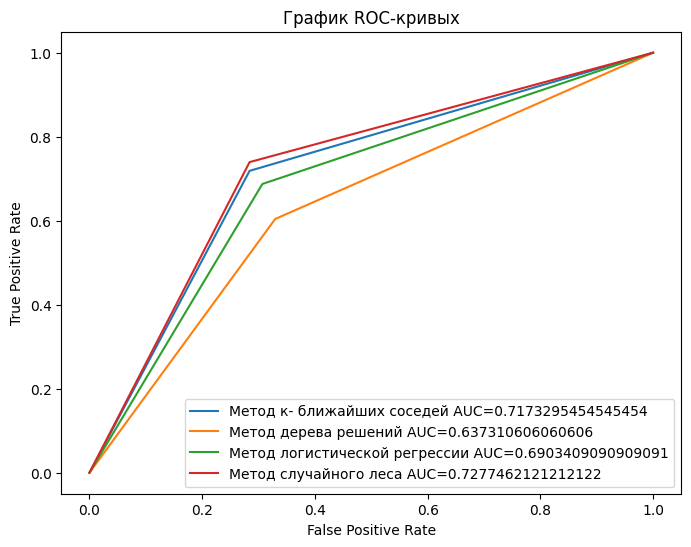

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn) # опусткается третий параметр (массив пороговых значений)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))

plt.plot(fpr_knn, tpr_knn, label=f"Метод к- ближайших соседей AUC={auc(fpr_knn, tpr_knn)}")
plt.plot(fpr_dt, tpr_dt, label=f"Метод дерева решений AUC={auc(fpr_dt, tpr_dt)}")
plt.plot(fpr_lr, tpr_lr, label=f"Метод логистической регрессии AUC={auc(fpr_lr, tpr_lr)}")
plt.plot(fpr_rf, tpr_rf, label=f"Метод случайного леса AUC={auc(fpr_rf, tpr_rf)}")
plt.legend()

plt.title("График ROC-кривых")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

На основе графика можно заметить, что линия метода случайного леса быстро поднимается к верхнему углу и далее идет по верхней границе с незначительным возрастанием, что свидетельствует о высоком качестве классификации, так как модель способна достигать высокого TPR при низком FRP. Линия метода дерева решений ближе всех к диагонали, что говорит о низком качестве классификации, так как модель не может отличить классы лучше чем случайный выбор.

**Вывод:**

В процессе выполнения работы были изучены алгоритмы и методы кластеризации на практике.


В ходе работы был проанализирован датасет с набором данных о сердечных болезнях. Исходя из полученных данных можно сказать, что количество данных о людях с сердечными болезнями и здоровых людях примерно одинаково.


На основе анализа матрицы рассеяния были выведены некоторые закономерности данных.

Анализ метрик, матрицы неточностей и графика ROC-кривых позволяет сделать вывод о различиях методов и их эффективности при классифицировании данных.

Метод случайного леса является лучшим из всех моделей, потому что он имеет самые высокие значения точности, полноты, сбалансированной точности и площади под roc-кривой. Это означает, что этот метод эффективно классифицирует объекты и минимизирует ошибки как первого, так и второго рода. Этот метод также устойчив к переобучению и шуму в данных, так как он использует ансамбль деревьев решений, которые голосуют за наилучший результат.

Метод дерева решений является худшим из всех моделей, потому что он имеет самые низкие значения точности, полноты, сбалансированной точности и площади под roc-кривой. Это означает, что этот метод неэффективно классифицирует объекты и допускает много ошибок как первого, так и второго рода. Этот метод также подвержен переобучению и шуму в данных, так как он строит одно дерево решений, которое может быть слишком сложным или слишком простым для данных.


Метод к-ближайших соседей является одним из хороших моделей, потому что он имеет высокие значения точности, полноты, сбалансированной точности и площади под roc-кривой. Это означает, что этот метод хорошо классифицирует объекты и сравнительно мало ошибается как при определении положительных значений, так и отрицательных. Этот метод также прост в реализации и интуитивно понятен, так как он использует расстояние между объектами.

Метод логистической регрессии является средней по качеству моделью, потому что он имеет средние значения точности, полноты, сбалансированной точности и площади под roc-кривой. Это означает, что этот метод справляется с классификацией объектов, но не лучше, чем метод к-ближайших соседей или метод случайного леса. Этот метод также математически обоснован и интерпретируем, так как он использует логистическую функцию для оценки вероятности принадлежности к классу.


**Дополнительное задание:**

15. Написать программу, которая для случайного для разного параметра n_estimators будет считать accuracy_score для тренировочных и тестовых данных (использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х - значение параметра n_estimators , по оси y - Accuracy, построить две линии для тренировочных и тестовых данных.

Первое максимальное значение accurcy для train достигается при n_estimators равном 25
Максимальное значение accurcy для test достигается при n_estimators равном 9


Text(0, 0.5, 'accuracy')

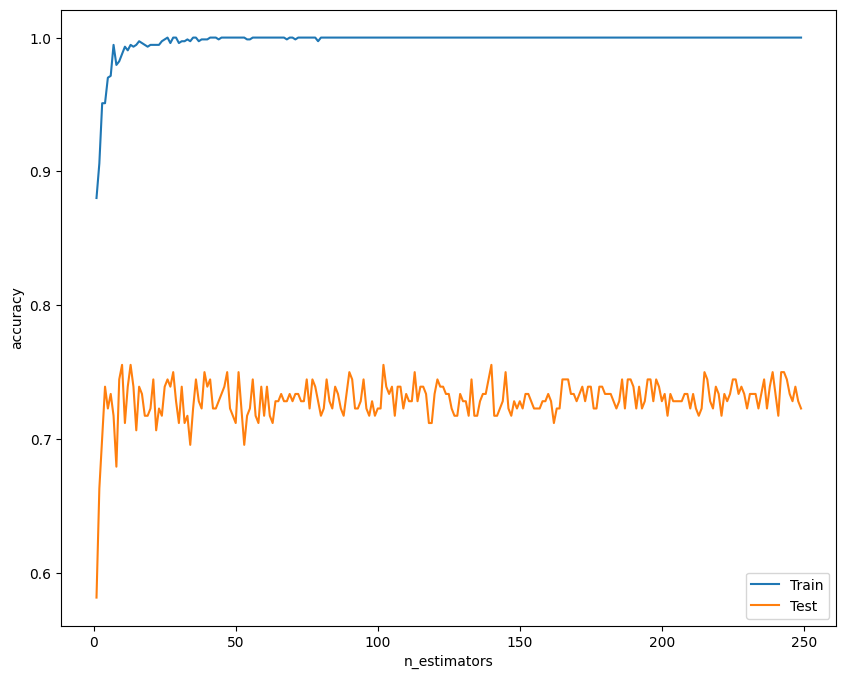

In [ ]:
score_train =[]
score_test = []
est = []

for n in range(1,250):
  est.append(n)
  rf = RandomForestClassifier(n_estimators=n)
  rf.fit(X_train_scaled, y_train)
  y_pred_train_rf = rf.predict(X_train_scaled)
  y_pred_test_rf = rf.predict(X_test_scaled)
  score_train.append(accuracy_score(y_train, y_pred_train_rf))
  score_test.append(accuracy_score(y_test, y_pred_test_rf))

print(f"Первое максимальное значение accurcy для train достигается при n_estimators равном {score_train.index(max(score_train))}")
print(f"Максимальное значение accurcy для test достигается при n_estimators равном {score_test.index(max(score_test))}")

plt.figure(figsize=(10, 8))

plt.plot(est, score_train, label="Train")
plt.plot(est, score_test, label="Test")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("accuracy")

На основе полученного графика можно заметить нестабильность значений accuracy score для тестового набора данных при различных значениях параметра n_estimators. Также по графику видно, что максимальное для наборов отличается.

In [ ]:
print(f"X_train_scaled = {X_train_scaled}")
print(f"X_test_scaled = {X_test_scaled}")

X_train_scaled = [[-1.3879846  -0.67577395  1.26768192 -0.5532177  -0.71654641  1.99445817]
 [ 0.76179531  0.46113717  0.86746436 -0.5532177  -0.83433047  0.76322832]
 [ 0.33183932 -0.24266495  0.96751875 -0.5532177   0.89316901 -0.84684149]
 ...
 [ 0.8692843  -0.1343877   0.3126173  -0.5532177   0.38277143  0.8579383 ]
 [-0.31309465 -0.1343877  -0.16036708 -0.5532177  -1.42325075 -0.84684149]
 [ 0.54681731  2.03115729  1.17672338 -0.5532177   0.14720332  2.37329813]]
X_test_scaled = [[-1.60296259  0.2987213   0.21256291 -0.5532177   0.61833955 -0.84684149]
 [ 0.9767733   0.35285992  0.18527535  1.80760667 -0.3239329   0.28967837]
 [ 0.9767733   2.03115729 -0.17855879 -0.5532177  -2.05143237  1.52090823]
 ...
 [-0.42058364  0.40699855  0.17617949 -0.5532177   1.32504388 -0.84684149]
 [ 1.51421827  0.67769167 -1.78852486  1.80760667 -0.00984208  0.8579383 ]
 [-1.06551762 -1.10888295  0.84927265 -0.5532177   0.6576009  -0.84684149]]


На основе выведенных данных можно увидеть как именно выглядят нормализованные данные.

9. Построить дерево решений в текстовом и графовом формате.

Визуализация в текстовом формате:

In [ ]:
from sklearn.tree import export_graphviz, export_text

text = export_text(dt)
print(text)

|--- feature_5 <= -0.23
|   |--- feature_2 <= -1.40
|   |   |--- feature_3 <= 0.63
|   |   |   |--- feature_0 <= -1.33
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -1.33
|   |   |   |   |--- feature_4 <= -0.34
|   |   |   |   |   |--- feature_5 <= -1.08
|   |   |   |   |   |   |--- feature_0 <= 0.76
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.76
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  -1.08
|   |   |   |   |   |   |--- feature_0 <= 0.71
|   |   |   |   |   |   |   |--- feature_0 <= 0.17
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.17
|   |   |   |   |   |   |   |   |--- feature_4 <= -0.78
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.27
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.39
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.39
|   |   |   | 

Визуализация в виде графа:

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,feature_names=X_train.columns, class_names=['0','1'], filled=True)

graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

В результате визуализации дерева решений в виде графа был создан файл tree.pdf, который находится в основной папке с данными. В нем содержится полный граф логики построения дерева решений.

Данное представление дерева решений дает возможность визуализировать и интерпретировать логику и результаты работы дерева решений. С помощью этого представления можно:

- Увидеть, какие признаки и какие значения этих признаков используются для разделения данных на узлы и листья дерева.
- Узнать, какое количество и какое распределение обучающих примеров попадает в каждый узел и лист дерева.
- Определить, какой класс или значение прогнозирует дерево для каждого листа.
- Понять, как дерево принимает решения для конкретных тестовых примеров, следуя по пути от корня к листу.
- Сравнить разные деревья решений по их структуре, глубине, сложности и точности.

Данное представление дерева решений может быть полезно для анализа данных, поиска закономерностей, выявления аномалий, оптимизации решений и объяснения моделей.